K Nearest Neighbours Algorithm and Diabetes Prediction

In [18]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler


# Outcome 1 =>Diabetes
# Outcome 0=> Healthy

data =pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


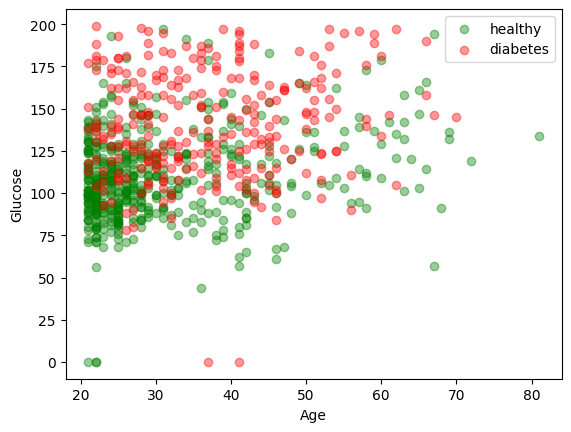

In [19]:
diabetes=data[data.Outcome==1]
healthy=data[data.Outcome==0]

# Example plotting code for the dataframes 'diabetes' and 'healthy' just for glucose and age. 
plt.scatter(healthy.Age,healthy.Glucose,color="green",label="healthy",alpha=0.4)
plt.scatter(diabetes.Age,diabetes.Glucose,color="red",label="diabetes",alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [20]:
y=data.Outcome.values
x_raw_data=data.drop(["Outcome"],axis=1)

x=(x_raw_data-np.min(x_raw_data))/(np.max(x_raw_data)-np.min(x_raw_data))

print("Before normalization:\n")
print(x_raw_data.head())

print("\n\n\nDatas after normalization to give AI:\n")
print(x.head())

# We do normalization  by scaling the data between 0 and 1, so that all features have equal importance in the  model. This is particularly important when dealing with numerical features that may be on very different scales e.

Before normalization:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  



Datas after normalization to give AI:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.007092  0.174941       0.085106       0.041371  0.000000  0.039716   
1     0.001182  0.100473       0.078014       0.034279  0.000000  0.031442   
2     0.009456  0.216312       0.075650       0.000000  0.

In [21]:
# Seperate Test Dataset and  Training Dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)
 
# Create KNN Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print("Verify  the accuracy of the model for k=3",knn.score(x_test,y_test))

Verify  the accuracy of the model for k=3 0.7792207792207793


In [22]:
# Find the optimal k value
counter=1
for k in range(1,11):
    knn_kd=KNeighborsClassifier(n_neighbors=k)
    knn_kd.fit(x_train,y_train)
    print("K:",counter," ","Accuracy value: %",knn_kd.score(x_test,y_test)*100)
    counter+=1


K: 1   Accuracy value: % 79.22077922077922
K: 2   Accuracy value: % 74.02597402597402
K: 3   Accuracy value: % 77.92207792207793
K: 4   Accuracy value: % 74.02597402597402
K: 5   Accuracy value: % 72.72727272727273
K: 6   Accuracy value: % 75.32467532467533
K: 7   Accuracy value: % 74.02597402597402
K: 8   Accuracy value: % 76.62337662337663
K: 9   Accuracy value: % 76.62337662337663
K: 10   Accuracy value: % 76.62337662337663


In [24]:
# New patient
import warnings
warnings.filterwarnings('ignore')
sc = MinMaxScaler()
sc.fit_transform(x_raw_data)
new_prediction = knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]

0